# Sales Analysis

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Task 1 : Merging 12 months sales data

In [3]:
dfs = []
directory = './Sales_Data/'

In [4]:
for filename in os.listdir(directory):
    if filename.endswith("csv"):
        filepath = os.path.join(directory,filename)
        dfs.append(pd.read_csv(filepath))

df = pd.concat(dfs,ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning

### Task 2 : Deleting rows with header names

Since we know that we imported data from 12 different files and each file had headers as first row. While importing data from each file, pandas also imported column header row from all the 12 files. We have **355 such rows** in our dataset which we need to delete so that we don't face any kind of issue/error while doing exploratory data analysis. 

We need to delete these rows first. 

In [6]:
df[df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
df.drop(df[df['Order ID'] == 'Order ID'].index, inplace=True)

### Task 3 : Finding blank rows & deleting them

An essential step of data cleaning is finding and deleting blank rows. In our dataset, we have **545 blank rows**.

In [8]:
df[df['Order ID'].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Line below will drop all the rows with null value in all the columns.

df.dropna(how='all',inplace=True)

### Task 4 : Checking & assigning appropriate datatype for columns

Due to the multiple column header rows imported in our dataset, the datatype of each column has been set to **``object``**. We need to assign the appropriate datatype to each column.

**Step 1 : Listing datatype & few rows to see the data inside our dataframe.**

In [10]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [11]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


**Step 2 : We can clearly see that datatype of columns 'Quantity Ordered', 'Price Each' & 'Order Date' needs to be changed.**

Changing the datatype of column 'Quantity Ordered' from object to int.

In [12]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

Changing the datatype of column 'Price Each' from object to float

In [13]:
df['Price Each'] = df['Price Each'].astype(float)

Changing the datatype of column 'Order Date' from object to datetime.

In [14]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

Now let's check the datatype of each column in our dataframe.

In [15]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

## Exploratory Data Analysis

In [30]:
sns.set_style('darkgrid')

**Question 1: What was the best month for sales? How much was earned that month?**

 In order to solve this question, we first need to create a new column in our dataframe called 'Month' and extract month from our 'Order Date' column. Also we need to add one more column called 'Order Value' with total amount of the order.

In [17]:
df['Month'] = df['Order Date'].dt.month

In [18]:
df['Order Value'] = df['Quantity Ordered'] * df['Price Each']

In [19]:
monthly_sales = pd.DataFrame(df.groupby(by='Month')['Order Value'].sum())
monthly_sales.reset_index(inplace=True)

In [20]:
monthly_sales

,Month,Order Value
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


<Axes: xlabel='Month', ylabel='Order Value'>

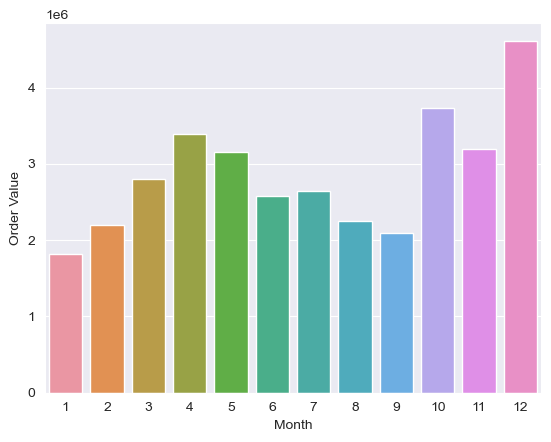

In [31]:
sns.barplot(data=monthly_sales, x='Month',y='Order Value')

**Question 2: What Pincode sold the most product?**

For this question, first we need to create a new column 'Pincode' and extract pincodes from 'Purchase Address' column. After that, we need to group our dataframe by 'Pincode' column and than sum the 'Quantity Ordered' column.

In [22]:
df['Pincode'] = df['Purchase Address'].str.split().str[-1]

In [23]:
pin_sales = pd.DataFrame(df.groupby(by='Pincode')['Quantity Ordered'].sum())
pin_sales.reset_index(inplace=True)

In [24]:
pin_sales = pin_sales.sort_values(by='Quantity Ordered', ascending=False)

<Axes: xlabel='Quantity Ordered', ylabel='Pincode'>

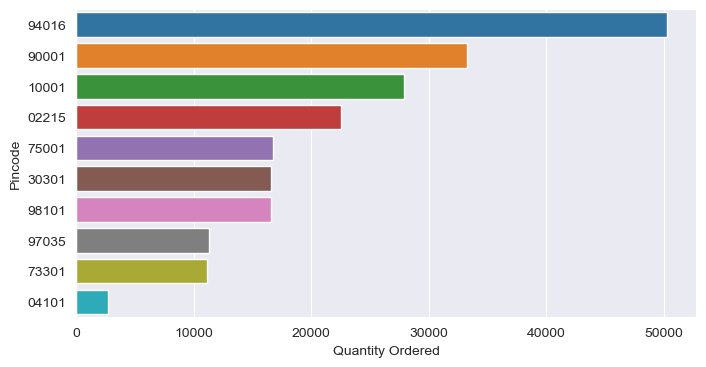

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(data=pin_sales, x='Quantity Ordered', y='Pincode', orient='h')

**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

For this question, we need to create a new column called 'Hour' and extract the hour from 'Order Date'. After that we need to create a line plot in order to visualize the hours with highest number of orders placed.

In [26]:
df['Hour'] = df['Order Date'].dt.hour
hour_orders = pd.DataFrame(df.groupby(by='Hour')['Order ID'].count())
hour_orders.reset_index(inplace=True)

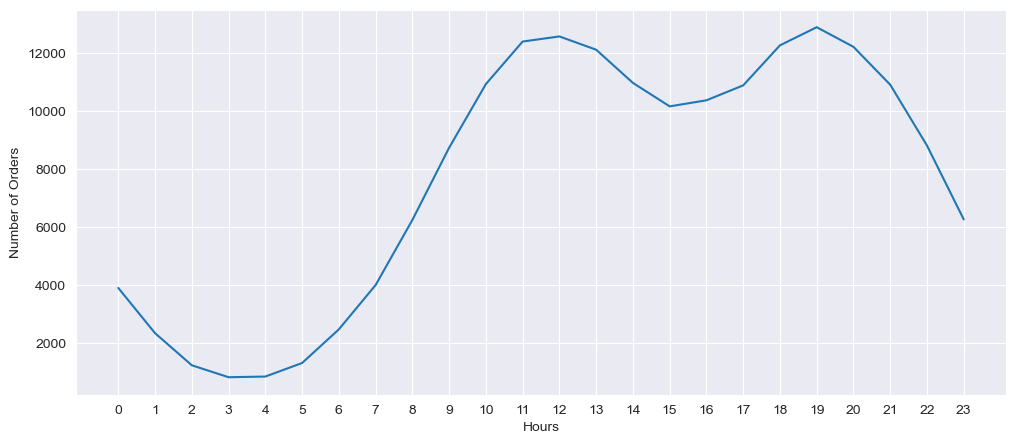

In [33]:
plt.figure(figsize=(12,5))
plt.plot(hour_orders['Hour'],hour_orders['Order ID'])
ax = plt.gca()
ax.set_xticks(hour_orders['Hour'])
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.show()

**Question 4: What products are most often sold together?**

To solve this questions, we need to group our data by 'Product' column and sort the values in descending order.

In [28]:
product_count = pd.DataFrame(df.groupby(by='Product')['Order ID'].count())
product_count.reset_index(inplace=True)
product_count.rename(columns={'Order ID':'Number of Orders'}, inplace=True)
product_count.sort_values(by='Number of Orders', ascending=False, inplace=True)

In [29]:
product_count

,Product,Number of Orders
15,USB-C Charging Cable,21903
12,Lightning Charging Cable,21658
5,AAA Batteries (4-pack),20641
4,AA Batteries (4-pack),20577
17,Wired Headphones,18882
6,Apple Airpods Headphones,15549
7,Bose SoundSport Headphones,13325
2,27in FHD Monitor,7507
18,iPhone,6842
1,27in 4K Gaming Monitor,6230
